# Exe 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser

plt.style.use('ggplot')

seed = 6102016
rng = np.random.RandomState(seed)

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

train_data = MNISTDataProvider('train', rng=rng)
valid_data = MNISTDataProvider('valid', rng=rng)
input_dim, output_dim = 784, 10

In [2]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
):
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors
    )

    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval,
                  stats[1:, keys[k]], label=k)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')

    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval,
                    stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

Epoch 5: 0.1s to complete
    error(train)=3.10e-01, acc(train)=9.13e-01, error(valid)=2.91e-01, acc(valid)=9.19e-01
Epoch 10: 0.1s to complete
    error(train)=2.88e-01, acc(train)=9.20e-01, error(valid)=2.76e-01, acc(valid)=9.23e-01
Epoch 15: 0.1s to complete
    error(train)=2.78e-01, acc(train)=9.23e-01, error(valid)=2.70e-01, acc(valid)=9.24e-01
Epoch 20: 0.1s to complete
    error(train)=2.72e-01, acc(train)=9.25e-01, error(valid)=2.67e-01, acc(valid)=9.24e-01
Epoch 25: 0.1s to complete
    error(train)=2.66e-01, acc(train)=9.26e-01, error(valid)=2.63e-01, acc(valid)=9.27e-01
Epoch 30: 0.1s to complete
    error(train)=2.62e-01, acc(train)=9.27e-01, error(valid)=2.61e-01, acc(valid)=9.28e-01
Epoch 35: 0.1s to complete
    error(train)=2.60e-01, acc(train)=9.28e-01, error(valid)=2.61e-01, acc(valid)=9.29e-01
Epoch 40: 0.1s to complete
    error(train)=2.58e-01, acc(train)=9.28e-01, error(valid)=2.60e-01, acc(valid)=9.29e-01
Epoch 45: 0.1s to complete
    error(train)=2.56e-01, acc

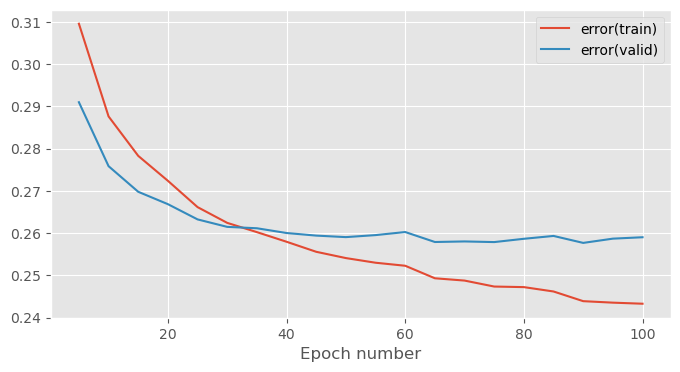

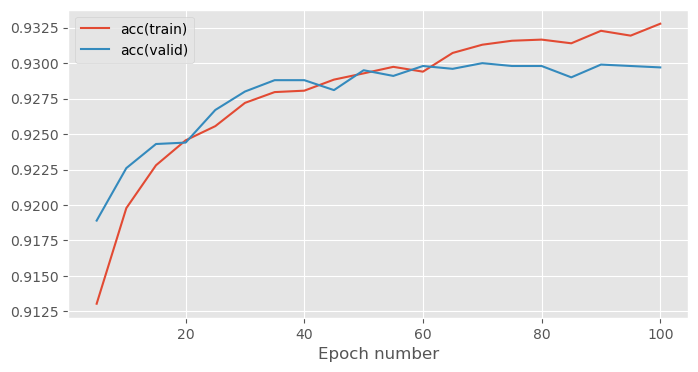

In [3]:
batch_size = 100
init_scale = 0.01
learning_rate = 0.1
num_epochs = 100
stats_interval = 5

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

model = MultipleLayerModel([
    AffineLayer(input_dim, output_dim, param_init, param_init),
    SoftmaxLayer()
])

error = CrossEntropyError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
    )

plt.show()

Epoch 5: 0.1s to complete
    error(train)=3.12e-01, acc(train)=9.12e-01, error(valid)=2.93e-01, acc(valid)=9.18e-01
Epoch 10: 0.1s to complete
    error(train)=2.89e-01, acc(train)=9.19e-01, error(valid)=2.77e-01, acc(valid)=9.21e-01
Epoch 15: 0.1s to complete
    error(train)=2.80e-01, acc(train)=9.21e-01, error(valid)=2.72e-01, acc(valid)=9.23e-01
Epoch 20: 0.1s to complete
    error(train)=2.71e-01, acc(train)=9.25e-01, error(valid)=2.66e-01, acc(valid)=9.26e-01
Epoch 25: 0.2s to complete
    error(train)=2.67e-01, acc(train)=9.26e-01, error(valid)=2.65e-01, acc(valid)=9.26e-01
Epoch 30: 0.1s to complete
    error(train)=2.64e-01, acc(train)=9.28e-01, error(valid)=2.62e-01, acc(valid)=9.28e-01
Epoch 35: 0.1s to complete
    error(train)=2.60e-01, acc(train)=9.28e-01, error(valid)=2.61e-01, acc(valid)=9.28e-01
Epoch 40: 0.1s to complete
    error(train)=2.58e-01, acc(train)=9.28e-01, error(valid)=2.61e-01, acc(valid)=9.28e-01
Epoch 45: 0.2s to complete
    error(train)=2.57e-01, acc

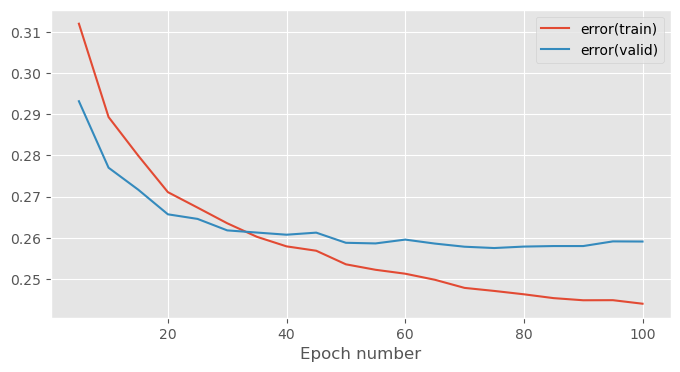

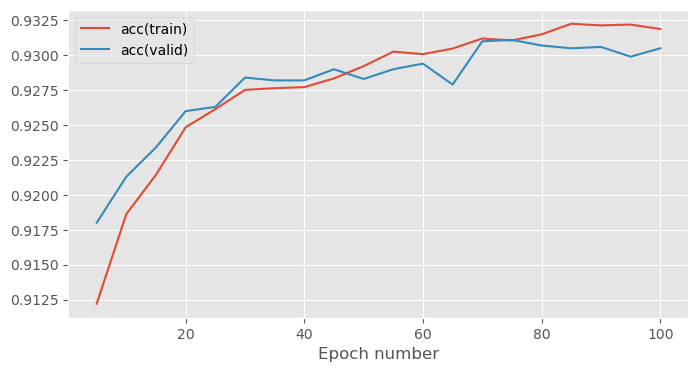

In [4]:
batch_size = 100
init_scale = 0.1
learning_rate = 0.1
num_epochs = 100
stats_interval = 5

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

model = SingleLayerModel(
    AffineLayer(input_dim, output_dim, param_init, param_init)
)

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
)

# Exe 2

#### invetigate:
    1. number of layers affect the model's performance on training/validation data set.
        No
    2. deeper model harder/earier to train in terms of *ease of choosing training hyperparameters* to give good *final performance* and /or *quick convergence*.
        yes
    3. sensitive to the choice of the parameter initialisation range; reasons for setting individual parameter initialisation scales for each `AffineLayer` in a model mights be useful; heuristics for setting the parameter initialisation scales 
        

In [5]:
logger.handlers = [logging.NullHandler()]

### Model with two Affine Layers

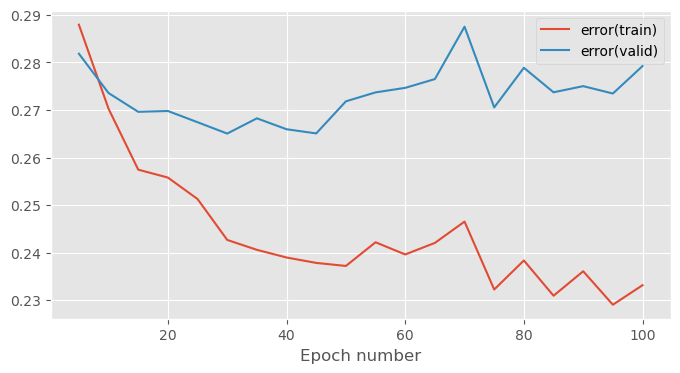

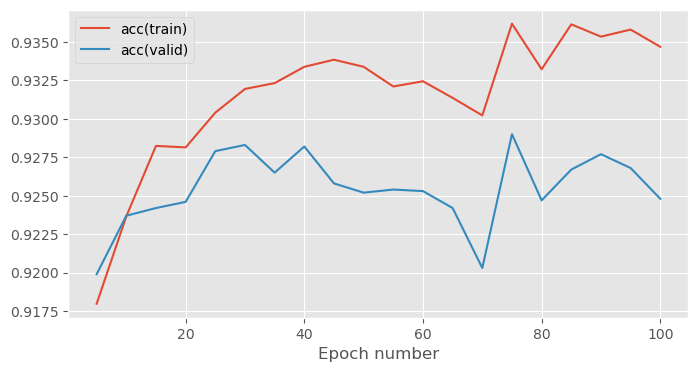

In [6]:
batch_size = 100
init_scale = 0.2
learning_rate = 0.1
num_epochs = 100
stats_interval = 5

hidden_dim = 100

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

layers = [
    AffineLayer(input_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, output_dim, param_init, param_init)]

model = MultipleLayerModel(layers)

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
)

3

In [7]:
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

layers = [
    AffineLayer(input_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, output_dim, param_init, param_init)]

model = MultipleLayerModel(layers)

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
)

KeyboardInterrupt: 

4

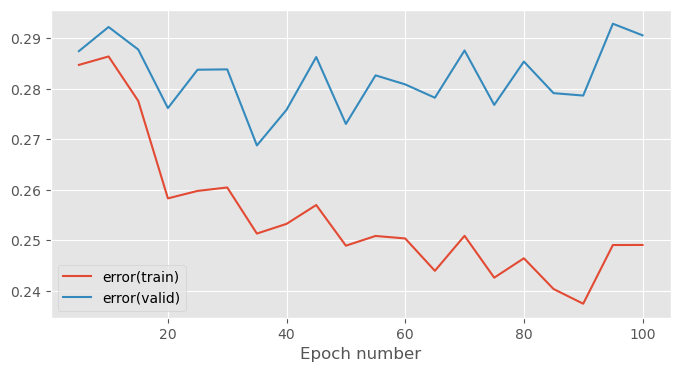

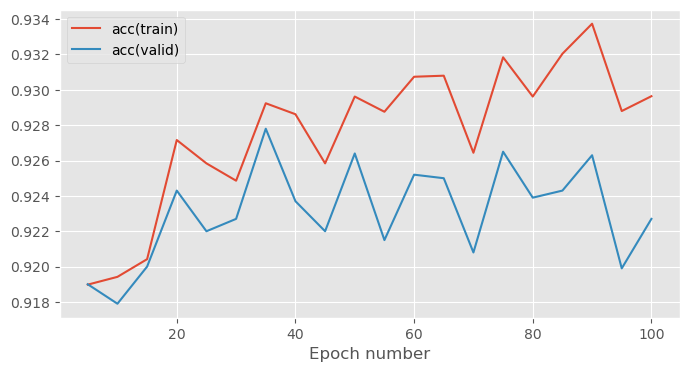

In [16]:
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

layers = [
    AffineLayer(input_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, output_dim, param_init, param_init)]

model = MultipleLayerModel(layers)

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
)

5

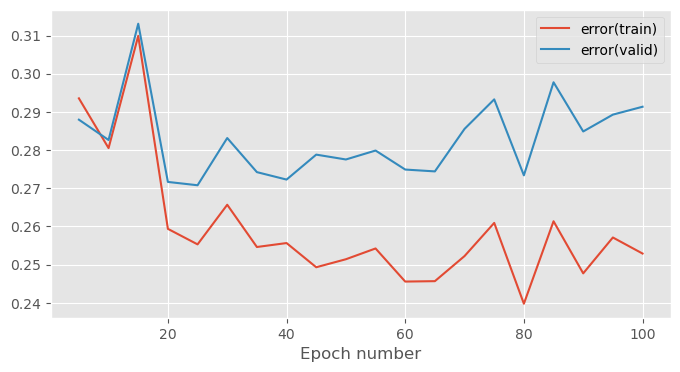

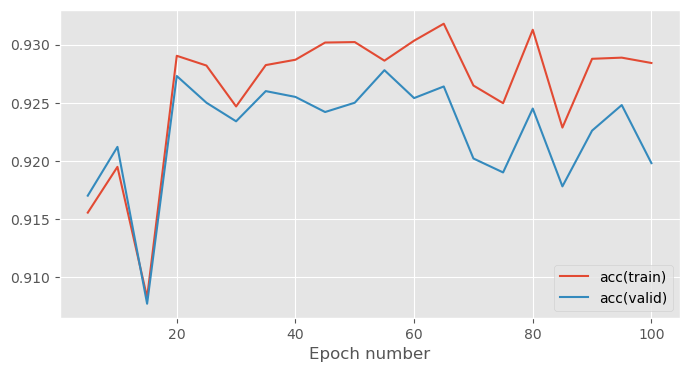

In [17]:
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size
valid_data.batch_size = batch_size

param_init = UniformInit(-init_scale, init_scale, rng=rng)

layers = [
    AffineLayer(input_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    AffineLayer(hidden_dim, output_dim, param_init, param_init)]

model = MultipleLayerModel(layers)

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval
)

# Exe 3

In [8]:
import numpy as np
from mlp.layers import Layer

class TanhLayer(Layer):
    def fprop(self, inputs):
        self.inputs = inputs
        return np.tanh(inputs)
    
    def bprop(self, inputs, outputs, grads_wrt_outputs):
        # TODO: why no partical derivative
        grads_wrt_inputs = grads_wrt_outputs * (1 - outputs**2)
        return grads_wrt_inputs

    def __repr__(self):
        return 'TanhLayer'
    
class ReluLayer(Layer):
    def fprop(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs)
    
    def bprop(self, inputs, outputs, grads_wrt_outputs):
        grads_wrt_inputs = grads_wrt_outputs * (self.inputs > 0)
        return grads_wrt_inputs
    
    def __repr__(self):
        return 'ReluLayer'

In [9]:
test_inputs = np.array([[0.1, -0.2, 0.3], [-0.4, 0.5, -0.6]])
test_grads_wrt_outputs = np.array([[5., 10., -10.], [-5., 0., 10.]])
test_tanh_outputs = np.array(
    [[ 0.09966799, -0.19737532,  0.29131261],
     [-0.37994896,  0.46211716, -0.53704957]])
test_tanh_grads_wrt_inputs = np.array(
    [[ 4.95033145,  9.61042983, -9.15136962],
     [-4.27819393,  0.,          7.11577763]])
tanh_layer = TanhLayer()
tanh_outputs = tanh_layer.fprop(test_inputs)
all_correct = True
if not tanh_outputs.shape ==test_tanh_outputs.shape:
    print('TanhLayer.fprop returned array with wrong shape.')
    all_correct = False
elif not np.allclose(test_tanh_outputs, tanh_outputs):
    print('TanhLayer.fprop calculated incorrect outputs.')
    all_correct = False
tanh_grads_wrt_inputs = tanh_layer.bprop(
    test_inputs, tanh_outputs, test_grads_wrt_outputs)
if not tanh_grads_wrt_inputs.shape == test_tanh_grads_wrt_inputs.shape:
    print('TanhLayer.bprop returned array with wrong shape.')
    all_correct = False
elif not np.allclose(tanh_grads_wrt_inputs, test_tanh_grads_wrt_inputs):
    print('TanhLayer.bprop calculated incorrect gradients with respect to inputs.')
    all_correct = False
if all_correct:
    print('Outputs and gradients calculated correctly for TanhLayer.')

Outputs and gradients calculated correctly for TanhLayer.


In [20]:
test_inputs = np.array([[0.1, -0.2, 0.3], [-0.4, 0.5, -0.6]])
test_grads_wrt_outputs = np.array([[5., 10., -10.], [-5., 0., 10.]])
test_relu_outputs = np.array([[0.1, 0., 0.3], [0., 0.5, 0.]])
test_relu_grads_wrt_inputs = np.array([[5., 0., -10.], [-0., 0., 0.]])
relu_layer = ReluLayer()
relu_outputs = relu_layer.fprop(test_inputs)
all_correct = True
if not relu_outputs.shape == test_relu_outputs.shape:
    print('ReluLayer.fprop returned array with wrong shape.')
    all_correct = False
elif not np.allclose(test_relu_outputs, relu_outputs):
    print('ReluLayer.fprop calculated incorrect outputs.')
    all_correct = False
relu_grads_wrt_inputs = relu_layer.bprop(
    test_inputs, relu_outputs, test_grads_wrt_outputs)
if not relu_grads_wrt_inputs.shape == test_relu_grads_wrt_inputs.shape:
    print('ReluLayer.bprop returned array with wrong shape.')
    all_correct = False
elif not np.allclose(relu_grads_wrt_inputs, test_relu_grads_wrt_inputs):
    print('ReluLayer.bprop calculated incorrect gradients with respect to inputs.')
    all_correct = False
if all_correct:
    print('Outputs and gradients calculated correctly for ReluLayer.')

Outputs and gradients calculated correctly for ReluLayer.



# Pytorch

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

torch.manual_seed(seed)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
# Set training run hyperparameters
batch_size = 128  # number of data points in a batch
learning_rate = 0.001  # learning rate for gradient descent
num_epochs = 50  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

In [13]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),((0.3081,)))
])

In [14]:
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)

In [15]:
test_dataset = datasets.MNIST('../data', train=False, download=True, transform=transform)

In [16]:
print("Train dataset: \n", train_dataset)
print(train_dataset.data.size())
print(train_dataset.targets.size())
print("\nTest dataset: \n", test_dataset)

Train dataset: 
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
torch.Size([60000, 28, 28])
torch.Size([60000])

Test dataset: 
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


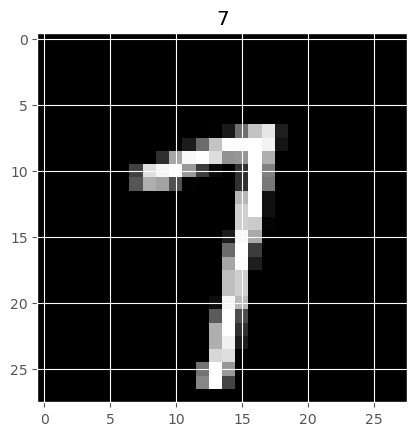

In [17]:
plt.imshow(train_dataset.data[42], cmap='gray')
plt.title('%i' % train_dataset.targets[42])
plt.show()

*Why would we want to randomly shuffle the data when creating the separate training and validation set?*

randomly shuffling the data helps ensure that both the training and validation sets are diverse and representataive of the overall dataset. If we don't shuffle the data, the model may learnspecific patterns related to the order of the data points, which can lead to overfitting. This is especially important if the data is **sorted in a particular way(e.g., by time)**, as the model could learn to associate the order with specific outcomes.


*We could just take the first 80% of data points and assign them to the training set and the last 20% of data points to the validation set. When and why would this be a bad practice?*
This apporach can be problematic if the data is ordered in a way that introduces bias, such as time series datta. The first 80% may have different characteristics compared to the last 20%, which could lead to a validation set that does not accurately reflect the general performance of the model. Consequently, the model's validation performance may not represent how it would perform in real-world scenarios, reducing the reliability of the performance evaluations.


*Why do we want to shuffle the training and valisation sets but not the test set (see `shuffle=False`)?*
The test set is meant to provide an unbiased evaluation of the model's performance on unseen data. Keeping the test set in its original order aloows us to assess how well the model generalizes to new, real-world data. Shuffling the test set could disrupt the relationships between data points and lead to unreliable evaluation metrics, making it diffcult to understand the model's true performance.

In [18]:
import torch.utils


valid_size = 0.2
num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

In [27]:
class MultipleLayerModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [28]:
input_dim = 1*28*28
output_dim = 10
hidden_dim = 100

model = MultipleLayerModel(input_dim, output_dim, hidden_dim).to(device)
print(model)

MultipleLayerModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [29]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
train_loss = []
valid_loss = []

train_acc = []
valid_acc = []

for i in range(num_epochs+1):
    model.train()
    batch_loss = []
    batch_acc = []
    for batch_idx, (x, t) in enumerate(train_loader):
        x = x.to(device)
        t = t.to(device)

        # forward
        y = model(x)
        E_value = loss(y, t)

        # backward
        optimizer.zero_grad()
        E_value.backward()
        optimizer.step()

        _, argmax = torch.max(y, 1)
        acc = (t == argmax.squeeze()).float().mean()

        batch_loss.append(E_value.item())
        batch_acc.append(acc.item())

    train_loss.append(np.mean(batch_loss))
    train_acc.append(np.mean(batch_acc))

    # validation
    model.eval()
    batch_loss = []
    batch_acc = []
    for batch_idx, (x, t) in enumerate(valid_loader):
        x = x.to(device)
        t = t.to(device)

        y = model(x)
        E_value = loss(y, t)

        _, argmax = torch.max(y, 1)
        acc = (t == argmax.squeeze()).float().mean()

        batch_loss.append(E_value.item())
        batch_acc.append(acc.item())

    valid_loss.append(np.mean(batch_loss))
    valid_acc.append(np.mean(batch_acc))

    if i % stats_interval == 0:
        print('Epoch: {} \tError(train): {:.6f} \tAccuracy(train): {:.6f} \tError(valid): {:.6f} \tAccuracy(valid): {:.6f}'.format(
            i, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))


Epoch: 0 	Error(train): 0.362783 	Accuracy(train): 0.895104 	Error(valid): 0.195349 	Accuracy(valid): 0.943152
Epoch: 5 	Error(train): 0.050654 	Accuracy(train): 0.983792 	Error(valid): 0.095306 	Accuracy(valid): 0.972545
Epoch: 10 	Error(train): 0.021243 	Accuracy(train): 0.992583 	Error(valid): 0.114634 	Accuracy(valid): 0.971604


KeyboardInterrupt: 

We can see below the evolution of our training and validation losses, as well as, the respective accuracies. We can see that the training loss decreases and the training accuracy increases with each epoch. However, the validation loss starts increasing after $10$ epochs and the validation accuracy increases only up to a certain point. 

*What could be happening here?*  
**Overfitting**. This indicates that after a certain point, the model is fittinf too closely to the training data, capturing noise or irrelevant patetrns. This results in poor generalization to unseen data (validation set), which is a classic sign of overfitting.

*Is training for 50 epoch a sensible choice?*  
No, training for 50 epochs might not be sensible, especially since the model starts overfitting after 10 epochs. Continuing to train beyond this point likely won’t improve generalization performance and may actually harm it by increasing the gap between training and validation performance.
After the validation loss starts increasing, the model is essentially learning patterns that don’t generalize well, which wastes computational resources and time.

*What number of epochs would be a better choice and why?*  
One effective approach is to stop training as soon as the validation loss starts increasing.
You might not always know the ideal number of epochs beforehand. It's good to use techniques like cross-validation or experiment with different values, but monitoring the validation loss is crucial.

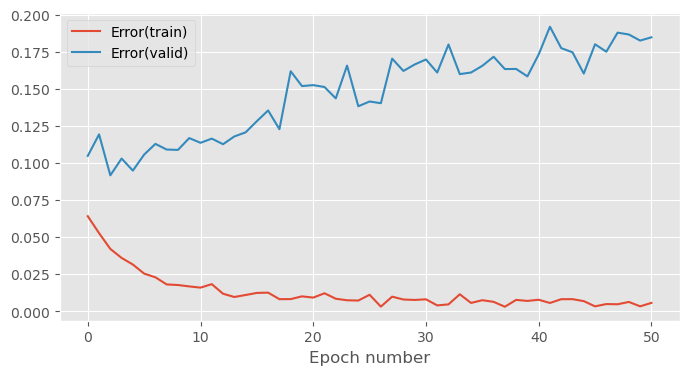

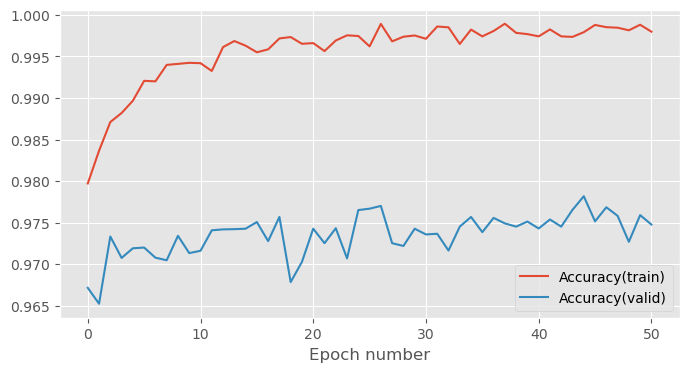

In [57]:
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(train_loss, label='Error(train)')
ax_1.plot(valid_loss, label='Error(valid)')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
ax_2.plot(train_acc, label='Accuracy(train)')
ax_2.plot(valid_acc, label='Accuracy(valid)')
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
plt.show()

In [59]:
test_acc = []
model.eval()
for batch_idx, (x, t) in enumerate(test_loader):
    x = x.to(device)
    t = t.to(device)

    y = model(x)

    _, argmax = torch.max(y, 1)
    acc = (t ==argmax.squeeze()).float().mean()

    test_acc.append(acc.item())
test_acc = np.mean(test_acc)
print('Accuracy(test): {:.6f}'.format(test_acc))

Accuracy(test): 0.975672
